---


# **Sentiment Analysis:**

---


This technique involves analyzing and categorizing emotions expressed in textual data as positive, negative, or neutral. It is a crucial tool for organizations to gauge public sentiment regarding specific words or topics.

In this notebook, we will construct a Sentiment Analysis model that classifies tweets as either Positive or Negative.


---
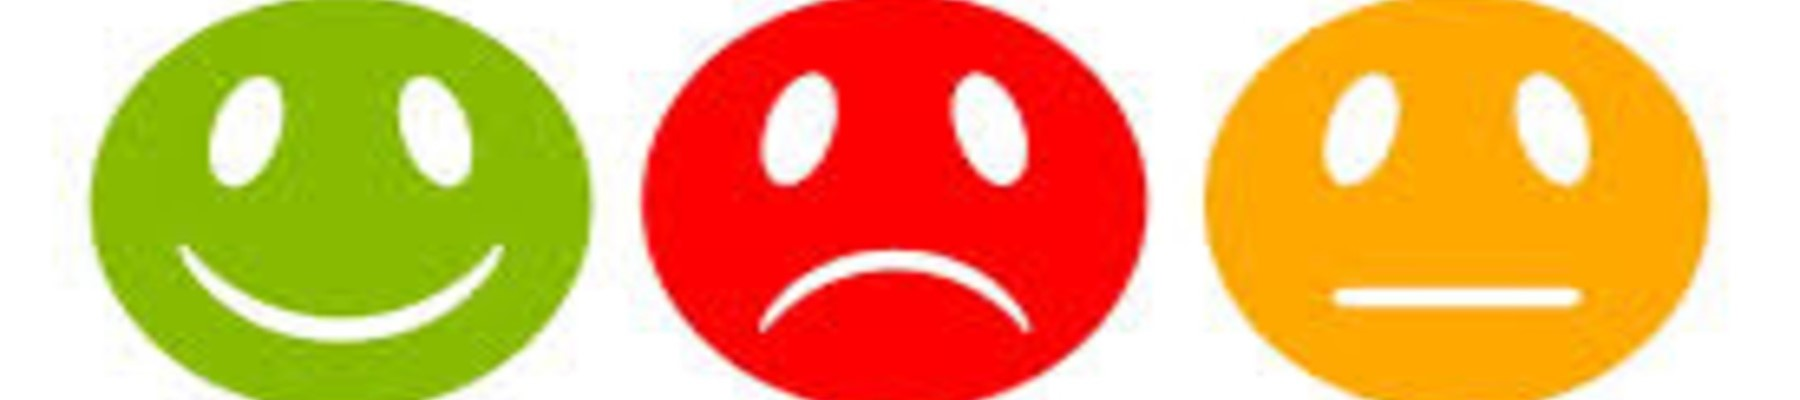

---


## **"Importing Essential Libraries for Data Processing and Visualization"**

This Python code cell imports several essential libraries commonly used in data science and data analysis tasks:

numpy and pandas are used to handle data loading, manipulation, and processing.

seaborn and matplotlib are used for plotting graphical representations of data.

The string and re modules are useful for text data cleaning and preprocessing tasks.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re

**"Loading Dataset from Google Drive into Colab"**

The **google.colab** module is utilized to mount Google Drive within a Colab notebook.

The **pd.read_csv** function from the pandas library is employed to load data from a CSV file located in Google Drive into a DataFrame.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/sentiment_training_data.csv',encoding='latin-1')

Mounted at /content/drive


In [ ]:
# sets the column names of the DataFrame to the specified list of labels.
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
# display the first 10 rows of the DataFrame
df.head(10)

,sentiment,id,date,query,user_id,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
5,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
6,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
7,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
8,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?
9,0,1467812416,Mon Apr 06 22:20:16 PDT 2009,NO_QUERY,erinx3leannexo,spring break in plain city... it's snowing




---


Checking for Missing Values in the DataFrame

In [ ]:
df.isnull()
df.isnull().sum()

,0
sentiment,0
id,0
date,0
query,0
user_id,0
text,0




---


Dropping Unnecessary Columns

In [ ]:
df = df.drop(['id', 'date', 'query','user_id'], axis = 1)
df.head()

,sentiment,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew




---


Unique values in column 'sentiment'

In [ ]:
print(df['sentiment'].unique())

[0 4]




---


Map 0-negative, 4-positive

In [ ]:

df['sentiment'] = df['sentiment'].map({0: 'negative', 4: 'positive'})
print(df)

        sentiment                                               text
0        negative  is upset that he can't update his Facebook by ...
1        negative  @Kenichan I dived many times for the ball. Man...
2        negative    my whole body feels itchy and like its on fire 
3        negative  @nationwideclass no, it's not behaving at all....
4        negative                      @Kwesidei not the whole crew 
...           ...                                                ...
1599994  positive  Just woke up. Having no school is the best fee...
1599995  positive  TheWDB.com - Very cool to hear old Walt interv...
1599996  positive  Are you ready for your MoJo Makeover? Ask me f...
1599997  positive  Happy 38th Birthday to my boo of alll time!!! ...
1599998  positive  happy #charitytuesday @theNSPCC @SparksCharity...

[1599999 rows x 2 columns]




---


### **Preprocess Text**

Text Preprocessing is traditionally an important step for Natural Language Processing (NLP) tasks. It transforms text into a more digestible form so that machine learning algorithms can perform better.

The Preprocessing steps taken are:

**Lower Casing:**
Each text is converted to lowercase.

**Replacing URLs:**
Links starting with "http" or "https" or "www" are replaced by "URL".

**Replacing Emojis:**
Replace emojis by using a pre-defined dictionary containing emojis along with their meaning. (eg: ":)" to "EMOJIsmile")

**Replacing Usernames:**
Replace @Usernames with word "USER". (eg: "@Kaggle" to "USER")

**Removing Non-Alphabets:**
Replacing characters except Digits and Alphabets with a space.

**Removing Consecutive letters:**
3 or more consecutive letters are replaced by 2 letters. (eg: "Heyyyy" to "Heyy")

**Removing Short Words:**
Words with length less than 2 are removed.

**Removing Stopwords:**
Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")

**Lemmatizing:**
Lemmatization is the process of converting a word to its base form. (e.g: “Great” to “Good”)

In [ ]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad',
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed',
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink',
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

## Defining set containing all stopwords in english.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
# Make sure NLTK is installed
!pip install nltk

# Import the nltk library
import nltk

# Download the 'wordnet' resource for lemmatization
nltk.download('wordnet')

# Import regular expressions library
import re

# Import the WordNetLemmatizer from NLTK for lemmatization
from nltk.stem import WordNetLemmatizer

# Define a function to preprocess text data
def preprocess(textdata):
    processedText = []  # List to hold the processed text

    # Create an instance of WordNetLemmatizer
    wordLemm = WordNetLemmatizer()

    # Define regex patterns for different types of noise in text
    urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"  # Pattern to identify URLs
    userPattern = '@[^\s]+'  # Pattern to identify @mentions
    alphaPattern = "[^a-zA-Z0-9]"  # Pattern to remove non-alphanumeric characters
    sequencePattern = r"(.)\1\1+"  # Pattern to detect sequences of repeated characters
    seqReplacePattern = r"\1\1"  # Pattern to replace sequences of repeated characters

    # Loop through each tweet in the input data
    for tweet in textdata:
        tweet = tweet.lower()  # Convert tweet to lower case

        # Replace all URLs with 'URL'
        tweet = re.sub(urlPattern, ' URL', tweet)
        # Replace all user mentions with 'USER'
        tweet = re.sub(userPattern, ' USER', tweet)
        # Replace all non-alphanumeric characters with space
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace sequences of repeated characters with two of the same
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        # Split the tweet into words and process each word
        for word in tweet.split():
            if len(word) > 1:  # Check if the word is longer than one character
                # Lemmatize the word to its base form
                word = wordLemm.lemmatize(word)
                tweetwords += (word + ' ')  # Append the processed word to the tweetwords string

        processedText.append(tweetwords)  # Append the processed tweet to the list

    return processedText  # Return the list of processed text

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Apply the preprocess function to the 'text' column of the DataFrame and store the results
processedtext = preprocess(df['text'])

# Show the top 50 lines of processedtext
processedtext[:50]

['is upset that he can update his facebook by texting it and might cry a result school today also blah ',
 'USER dived many time for the ball managed to save 50 the rest go out of bound ',
 'my whole body feel itchy and like it on fire ',
 'USER no it not behaving at all mad why am here because can see you all over there ',
 'USER not the whole crew ',
 'need hug ',
 'USER hey long time no see yes rain bit only bit lol fine thanks how you ',
 'USER nope they didn have it ',
 'USER que me muera ',
 'spring break in plain city it snowing ',
 'just re pierced my ear ',
 'USER couldn bear to watch it and thought the ua loss wa embarrassing ',
 'USER it it count idk why did either you never talk to me anymore ',
 'USER would ve been the first but didn have gun not really though zac snyder just doucheclown ',
 'USER wish got to watch it with you miss you and USER how wa the premiere ',
 'hollis death scene will hurt me severely to watch on film wry is director cut not out now ',
 'about to f

In [ ]:
!pip install sentence-transformers
!pip install torch
!pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 3.6 MB/s eta 0:00:00




---
**Converting Tweets into Embeddings using Hugging base Model**

#### Using this model deepset/roberta-base-squad2 of hugging face and convert this df data set into embeddings, with progress bar and eta


In [ ]:
from sentence_transformers import SentenceTransformer, util
from tqdm.notebook import tqdm

model = SentenceTransformer('deepset/roberta-base-squad2')

embeddings = []
for text_chunk in tqdm(df['text'], desc="Generating Embeddings", unit="text"):
    embeddings.append(model.encode(text_chunk))

df['embeddings'] = embeddings


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at deepset/roberta-base-squad2 and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Generating Embeddings:   0%|          | 0/1599999 [00:00<?, ?text/s]



---


Saving all embeddings into google drive as pickle file.

In [ ]:
# import pickle
# with open('/content/drive/MyDrive/all_embeddings.pkl', 'wb') as f:
#   pickle.dump(subset2_embeddings, f)

In [ ]:
# from sentence_transformers import SentenceTransformer
# # Load a pre-trained Sentence Transformer model
# model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
# embedding = model.encode(processedtext, show_progress_bar=True)

Batches:   0%|          | 0/50000 [00:00<?, ?it/s]

In [ ]:
# # Prompt: save these embeddings on drive as pickle
# import pickle
# with open('/content/drive/MyDrive/embeddings_para.pkl', 'wb') as f:
#   pickle.dump(embedding, f)

#### Load combined embeddings from drive

In [ ]:

import pickle  # Import the pickle module to handle serialization and deserialization.

# Open the file containing embeddings in binary read mode
with open('/content/drive/MyDrive/all_embeddings.pkl', 'rb') as f:
    all_embeddings = pickle.load(f)  # Load the embeddings from the pickle file into the variable all_embeddings.

print(np.shape(all_embeddings))  # Print the shape of the all_embeddings array to understand its dimensions.

(1599999, 768)


##### **Import Important Libraries for Deep Learning**

This cell includes a series of import statements that are essential for a typical machine learning or deep learning workflow in Python. Each import serves a specific function, ranging from data handling and model construction to optimization and evaluation. Here's a breakdown of the roles each imported module plays:

**NumPy:**
Supports large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these.

**Pickle:**
For serializing and deserializing Python objects, useful for saving and loading models.

**train_test_split:**
From scikit-learn, splits data into training and testing sets.

**TensorFlow Keras:**
Provides tools for building and training neural networks:

**Sequential:**
For creating models layer by layer.

**Dense and Dropout:**
Dense layers for neural connectivity and Dropout for preventing overfitting.

**Adam:**
An optimizer for efficient stochastic gradient descent.

**to_categorical:**
Converts class vectors to binary class matrices.

**EarlyStopping:**
Callback to stop training when performance stops improving.



In [ ]:
# Import NumPy, a fundamental package for scientific computing with Python.
import numpy as np

# Import the pickle module to serialize and deserialize a Python object structure.
import pickle

# Import train_test_split function from scikit-learn to split arrays or matrices into random train and test subsets.
from sklearn.model_selection import train_test_split

In [ ]:
# Convert sentiment labels to binary (0 for negative, 1 for positive)
labels = df['sentiment'].map({'negative': 0, 'positive': 1}).values

# Check the shape of labels to ensure it matches the embeddings
print("Labels shape:", labels)

Labels shape: [0 0 0 ... 1 1 1]


In [ ]:
import numpy as np
# from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

# Assuming `all_embeddings` and `labels` are lists, convert them to NumPy arrays
embeddings_p = np.array(all_embeddings)
labels = np.array(labels)

# Split the data into training and testing sets (95% train, 5% test)
X_train, X_test, y_train, y_test = train_test_split(embeddings_p, labels, test_size=0.05, random_state=42)

# Check the shapes of the training and testing sets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (1519999, 768)
Testing data shape: (80000, 768)


##### **Training Model**
The model is structured with multiple dense layers and incorporates regularization, normalization, activation adjustments, and dropout to enhance its performance and generalization capabilities. Here’s a brief explanation of the model configuration and the rationale behind each choice:

**Model Configuration**

**Sequential Model:**

A Sequential model in Keras is used for creating a linear stack of layers, which means each layer has exactly one input tensor and one output tensor.
First Dense Layer (Input Layer):

**Dense Layer:** Consists of 1024 units and uses L2 regularization to prevent overfitting by penalizing large weights.
**Batch Normalization:**
Stabilizes the learning process and dramatically reduces the number of training epochs required to train deep networks.

**LeakyReLU Activation:**
Allows a small gradient when the unit is inactive and has shown better performance than the regular ReLU function in many scenarios.

**Dropout:**
Randomly sets input units to 0 at a rate of 20% at each step during training, which helps prevent overfitting.

**Second Dense Layer:**

512 units, also with L2 regularization.
ELU Activation: Exponential Linear Unit (ELU) helps to speed up learning in deep neural networks.
Dropout: Increased to 30% to further aid in preventing overfitting.

**Third and Fourth Dense Layers:**
**Dense Layer:**

These layers follow a similar pattern, including batch normalization and dropout but vary in the number of units and use ReLU for activation in additional dense layers nested within. The layering of dense layers with non-linear activation functions allows the model to learn more complex patterns.

**Flattening Layer:**

The Flatten layer is used to flatten the input: no parameters are learned for this layer, it simply reshapes the output of the previous layer to make it suitable for input to the final Dense output layer.

**Output Layer:**

A single-unit dense layer with a sigmoid activation function is used to output a probability indicating the likelihood of the input belonging to one of the two classes (binary classification).

In [ ]:
# Import Sequential from tensorflow.keras to build a model layer by layer for most problems.
from tensorflow.keras.models import Sequential

# Import Dense, and Dropout layers from tensorflow.keras to use in the neural network.
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU, ELU, Flatten

# Import Adam optimizer from tensorflow.keras which is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
from tensorflow.keras.optimizers import Adam

# Import to_categorical from tensorflow.keras to convert a class vector (integers) to binary class matrix for use with categorical crossentropy.
from tensorflow.keras.utils import to_categorical

# Import EarlyStopping from tensorflow.keras to stop training when a monitored metric has stopped improving.
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow.keras.regularizers import l2

# Build the deep neural network model
model = Sequential()

# Add the first Dense layer with Batch Normalization and LeakyReLU activation
# Updated input shape to reflect 1D data
model.add(Dense(1024, input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.2))

# Add the second Dense layer with Batch Normalization and ELU activation
model.add(Dense(512, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(ELU(alpha=1.0))
model.add(Dropout(0.1))

# Add the third Dense layer with Batch Normalization and ReLU activation (hidden layer 1)
model.add(Dense(128, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))

# Add the fourth Dense layer with Batch Normalization and ReLU activation (hidden layer 2)
model.add(Dense(64, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))

# Flatten the output before the final Dense layer
model.add(Flatten()) # Add a Flatten layer

# Add the output Dense layer for binary classification with Sigmoid activation
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, min_lr=0.0001)
model.summary()

from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = dict(enumerate(class_weights))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 1024)                │         787,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ elu_3 (ELU)                          │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,451,201 (5.54 MB)

 Trainable params: 1,447,745 (5.52 MB)

 Non-trainable params: 3,456 (13.50 KB)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=8000,
    validation_data=(X_test, y_test),
    class_weight=class_weights,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - accuracy: 0.7686 - loss: 1.3664 - val_accuracy: 0.7149 - val_loss: 0.6992 - learning_rate: 0.0010
Epoch 2/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.8072 - loss: 0.4656 - val_accuracy: 0.6303 - val_loss: 0.6190 - learning_rate: 0.0010
Epoch 3/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.8095 - loss: 0.4402 - val_accuracy: 0.7987 - val_loss: 0.4744 - learning_rate: 0.0010
Epoch 4/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.8099 - loss: 0.4350 - val_accuracy: 0.8027 - val_loss: 0.4449 - learning_rate: 0.0010
Epoch 5/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.8109 - loss: 0.4320 - val_accuracy: 0.7276 - val_loss: 0.6483 - learning_rate: 0.0010
Epoch 6/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.8115 - loss: 0.4317 - val_accuracy: 0.7912 - val_loss: 0.4577 - learning_rate: 0.0010
Epoch 7/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.8120 - 

In [ ]:
model.save('/content/drive/MyDrive/trained_model_83.h5')

In [ ]:
# Evaluate the model on the test set
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
# Evaluate the model on the test set
results = model.evaluate(X_test, y_test)

# Check if results contain both loss and accuracy
if isinstance(results, list):
    loss, accuracy = results
    print(f'Test Loss: {loss:.4f}')
    print(f'Test Accuracy: {accuracy:.4f}')
else:
    loss = results
    print(f'Test Loss: {loss:.4f}')


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8182 - loss: 0.4042
Test Loss: 0.4022
Test Accuracy: 0.8200


In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Convert the predictions to binary format (0 or 1)
predicted_classes = (predictions > 0.5).astype("int32")

# Display some example predictions alongside their true labels
for i in range(10):
    print(f"True Label: {y_test[i]}, Predicted Label: {predicted_classes[i][0]}")


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 1
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 1
True Label: 1, Predicted Label: 1
True Label: 0, Predicted Label: 0
True Label: 0, Predicted Label: 0
True Label: 1, Predicted Label: 1


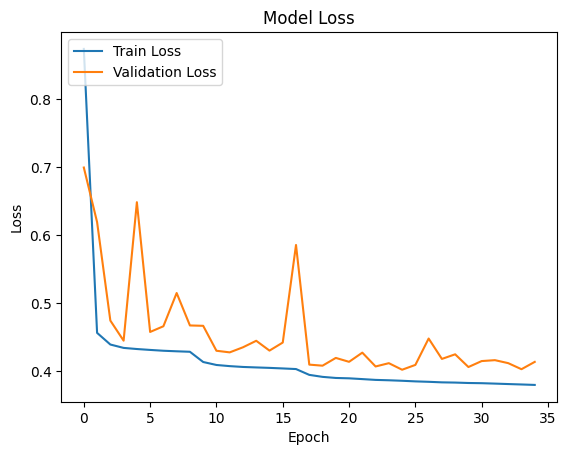

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [ ]:
# Evaluation metrices

from sklearn.metrics import confusion_matrix, classification_report

# Generate confusion matrix
cm = confusion_matrix(y_test, predicted_classes)
print("Confusion Matrix:")
print(cm)

# Generate classification report
report = classification_report(y_test, predicted_classes)
print("\nClassification Report:")
print(report)


Confusion Matrix:
[[31838  8161]
 [ 6242 33759]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82     39999
           1       0.81      0.84      0.82     40001

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



In [ ]:
import re
from transformers import RobertaTokenizer, RobertaModel
import torch
from tensorflow.keras.models import load_model

# Function to clean the text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'#\w+', '', text)     # Remove hashtags
    text = re.sub(r'\W', ' ', text)      # Remove special characters
    text = text.lower()                  # Convert to lowercase
    return text

# Load the tokenizer and model from Hugging Face
tokenizer = RobertaTokenizer.from_pretrained('deepset/roberta-base-squad2')
model = RobertaModel.from_pretrained('deepset/roberta-base-squad2')

# Load your trained Keras model
keras_model = load_model('/content/drive/My Drive/trained_model_83.h5')  # Replace with your actual model file path

# Run in an interactive loop
while True:
    # Get input sentence from user
    input_sentence = input("Enter a sentence (or type 'exit' to quit): ")

    if input_sentence.lower() == 'exit':
        break

    # Clean the sentence
    cleaned_sentence = clean_text(input_sentence)

    # Tokenize the sentence
    inputs = tokenizer(cleaned_sentence, return_tensors='pt')

    # Generate embeddings
    with torch.no_grad():
        outputs = model(**inputs)
        sentence_embedding = outputs.last_hidden_state.mean(dim=1).numpy()  # Take the mean of the output to get a fixed-size embedding

    # Predict the sentiment
    prediction = keras_model.predict(sentence_embedding)

    # Convert the prediction to a binary class (0 or 1)
    predicted_class = (prediction > 0.5).astype("int32")

    # Map the predicted class back to the sentiment label
    sentiment_label = 'positive' if predicted_class[0][0] == 1 else 'negative'

    # Display the result
    print(f"The predicted sentiment for the sentence is: {sentiment_label}\n")


Some weights of RobertaModel were not initialized from the model checkpoint at deepset/roberta-base-squad2 and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
